In [28]:
import math
import numpy as np
from matplotlib import pyplot as plt

DAC parameter and calculations in fixed point SQ15.16 format

Frequency unit: 1 kHz

Max Frequency: (1 << 15) kHz = 32 MHz

Min Frequency (resolution): 1 / (1 << 16) kHz = 15 mHz

Size unit: 1 Byte

Max size: 32 KB

Amplitude unit: 1

Amplitude range: 0 ... 1

Amplitude resolution: 15e-6 (DAC 488e-6)

Sinus calculation: SQ0.31 format

DAC format: SQ0.11 format (configuration setting)

In [3]:
def q31(value: float) -> int:
    return int(value * (1 << 31))

In [2]:
def q16(value: float) -> int:
    return int(value * (1 << 16))

In [10]:
def format_q16(value):
    return value / (1 << 16)

In [19]:
def format_q31(value):
    return value / (1 << 31)

In [4]:
def mul16(a, b):
    return (a * b) >> 16

In [5]:
def div16(a, b):
    return (a << 16) // b

In [6]:
frequency = q16(2) # kHz

In [7]:
def lut(frequency):
    if frequency < q16(0.250):
        return q16(200)
    if frequency < q16(0.500):
        return q16(500)
    return q16(1e3)

In [9]:
samplerate = lut(frequency)
print(samplerate / (1 << 16))

1000.0


In [22]:
size = samplerate // frequency
print(size)

500


In [23]:
angle_increment = q31(2) / size
print(format_q31(angle_increment))

0.004


In [30]:
def sin31(x):
    return int(math.sin(math.pi * x / (1 << 31)) * (1 << 31))

In [39]:
memory = np.ndarray(size)

for i in range(size):
    x = i * angle_increment
    y = sin31(x)
    memory[i] = y >> 20

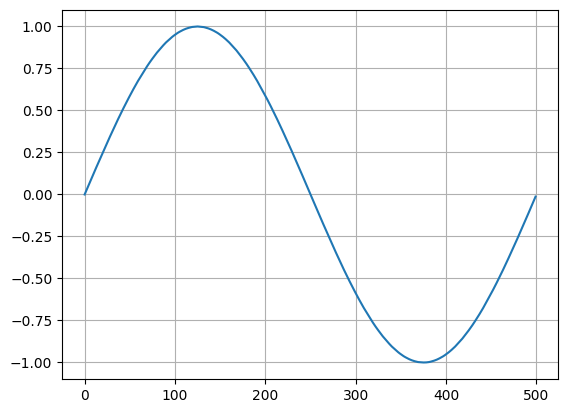

In [41]:
fig, ax = plt.subplots()
ax.plot(memory / 2048)
ax.grid()